## STEP-1 : Importing all the required packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## When you import matplotlib, the inline backend is automatically activated. This means you do not need to explicitly use %matplotlib inline 
## to display plots inline.
## Including %matplotlib inline explicitly does no harm and can improve clarity and compatibility.
%matplotlib inline

## Setting the seed ensures that the sequence of random numbers generated is the same every time the code is run.
np.random.seed(3)

# Neural network model with one perceptron and one input feature for Regression problem

# STEP-2 : Importing the tvmarketing.csv data from the kaggle datasets

In [5]:
df = pd.read_csv('tvmarketing.csv')
df.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


In [71]:
df_o = pd.read_csv('tvmarketing.csv')

#### Inspecting the basic characteristis  of the data

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Sales   200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


In [8]:
df.columns

Index(['TV', 'Sales'], dtype='object')

In [9]:
df.describe()

,TV,Sales
count,200.000000,200.000000
mean,147.042500,14.022500
std,85.854236,5.217457
min,0.700000,1.600000
25%,74.375000,10.375000
50%,149.750000,12.900000
75%,218.825000,17.400000
max,296.400000,27.000000


In [10]:
df.shape

(200, 2)

#### 1.Shape of the data tells us : It has 200 values for the TV and 200 values for the Sales

#### 2. If TV is the input feature then Sales is the output. For a set of new data on TV, we want to predict the Sales data 

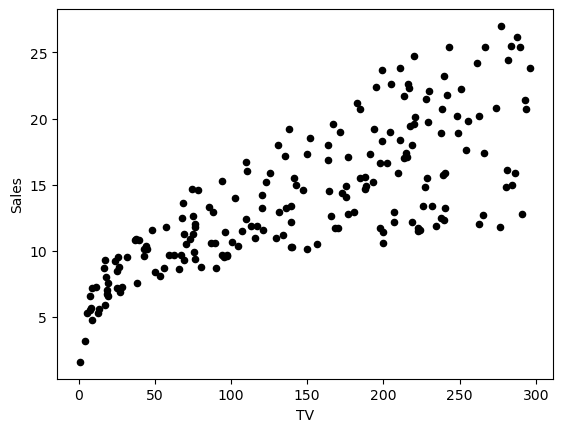

In [13]:
df.plot(x = 'TV' , y = 'Sales' , kind = 'scatter' , color = 'black');
plt.show();

#### We want to fit the best fitting line that predicts the Sales for the given TV data

# Standard Z Normalization :
#### Standard Z-normalization, often referred to as Z-score normalization or standardization, is a technique used to scale data so that it has a mean of 0 and a standard deviation of 1. This is particularly useful in machine learning and statistical analysis, where variables with different units or scales can lead to biased results.

#### Formula used ::::  normalized_data = (data - data.mean()) / data.std() 

#### Since TV and Sales data has different units and to make the gradient descent algorithm efficient , we are doing the standard Z normalization

In [17]:
df['TV'] = (df['TV'] - np.mean(df['TV']) )/ np.std(df['TV'])

In [18]:
df['Sales'] = (df['Sales'] - np.mean(df['Sales']) )/ np.std(df['Sales'])

In [19]:
df.head()

,TV,Sales
0,0.969852,1.552053
1,-1.197376,-0.696046
2,-1.516155,-0.907406
3,0.052050,0.860330
4,0.394182,-0.215683


#### Plotting the normalized data in scatter format

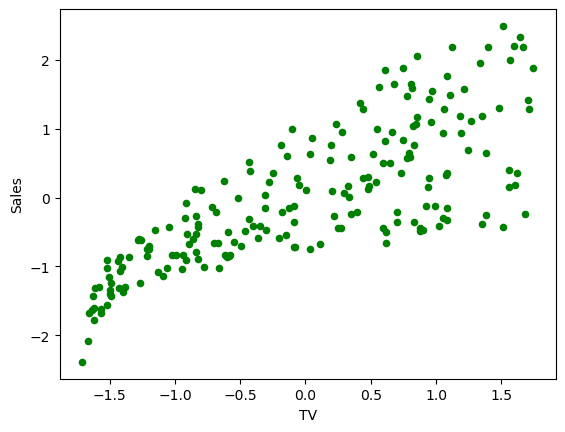

In [21]:
df.plot(x = 'TV' , y = 'Sales' ,kind = 'scatter' , color = 'green')
plt.show()

#### TV is our 'x' and Sales is our 'y'. Reshape these data into ROW VECTORS

In [23]:
x_norm = df['TV']
y_norm = df['Sales']
## checking the shape of the x_norm and the y_norm
print(x_norm.shape)
print(y_norm.shape)

(200,)
(200,)


In [24]:
## Reshaping them into the row vectors
x_norm = np.array(x_norm).reshape((1,len(x_norm)))
y_norm = np.array(y_norm).reshape((1,len(y_norm)))

print(x_norm.shape)
print(y_norm.shape)

(1, 200)
(1, 200)


#### Find the number of training examples from the shape of the x_norm

In [26]:
print('Total number of training examples is {}'.format(x_norm.shape[1]))

Total number of training examples is 200


# Implementing the Neural Network Model for Linear Regression

# Define the Structure of the Neural network
#### Input layer has One feature or One input
#### Output layer also has one output
#### The size of the input layer is the number of rows in the x_norm and size of output layer is the number of rows in the y_norm

In [29]:
def layer_size(x,y):
    n_x = x.shape[0]
    n_y = y.shape[0]
    return (n_x,n_y)

(n_x , n_y) = layer_size(x_norm , y_norm)
print('The size of the input layer is {}'.format(n_x))
print('The size of the output layer is {}'.format(n_y))

The size of the input layer is 1
The size of the output layer is 1


# Inititializing the weights and biases of the neural network model.
#### Weight is an array of shape  = n_y X n_x
#### Bias is an array of shape = n_y X 1

In [31]:
def initialize_parameters(n_x , n_y):
    W = np.random.randn(n_x,n_y) * 0.01  ## weight generated is a 2D array with one row and one column.eg [[0.5454]]
    B = np.zeros((n_y , 1))
    parameters = {'weight':W , 'bias': B}
    return parameters

parameters = initialize_parameters(n_x , n_y)
print('Initial value of the weight taken is : {}'.format(parameters['weight']))
print('Initial value of the bias taken is : {}'.format(parameters['bias']))

Initial value of the weight taken is : [[0.01788628]]
Initial value of the bias taken is : [[0.]]


# Initiating the forward propagation 
#### y_hat = w.x + b ,  where y_hat will be the predicted value
#### matrix of w and x : inner order must be same to implement the matrix multiplication
#### w matrix is of size (1,1) while x matrix is of size (1,200),so it will work.
#### Also size of b is (1,1) in our case

In [33]:
def forward_propagation(x,parameters):
    W = parameters['weight']
    B = parameters['bias']
    y_hat = np.matmul(W,x) + B
    z = y_hat
    return z

y_hat = forward_propagation(x_norm , parameters)  ## here parameters is a dictionary we got in previous cell containing the weight and the bias values
print('The shape of the y_hat is {}'.format(y_hat.shape))  ## y_hat is also a 2D array of shape (1,200)
print('First few values of the y_hat is {}'.format(y_hat[0,0:6])) ## here 0 means first row and 0:5 means first five column values in the first row

The shape of the y_hat is (1, 200)
First few values of the y_hat is [ 0.01734705 -0.02141661 -0.02711838  0.00093098  0.00705046 -0.02889366]


# Computing the Cost function
#### For cost function we need predicted values (y_hat,which is an array of size (1,200)) and the actual values (y_norm , which is also an array of the size (1,200))

In [35]:
def cost_function(y_hat , y):
    m = y_hat.shape[1]
    cost = np.sum((y_hat - y)**2) / (2*m)
    return cost

print('Cost  = {}'.format(cost_function(y_hat , y_norm)))

Cost  = 0.4861688708015972


# Initiating Backward Propagation 
## Calculating the partial derivatives of cost function w.r.t weight and bias

In [37]:
def backward_propagation(y_hat , y , x):
    m = x.shape[1]
    error = y_hat - y
    dw = 1/m * np.dot(error , x.T) ## error has a size (1,200) while x has a size (1,200).we need to transpose the x_matrix 
    db = 1/m * np.sum(error , axis=1 , keepdims = True)
    derivative = {'DW':dw , 'DB' : db}
    return derivative

derivative = backward_propagation(y_hat , y_norm , x_norm)

print('dL/dw = {}'.format(derivative['DW']))  ## 2D array of size (1,1)
print('dL/db = {}'.format(derivative['DB']))  ## 2D array of size (1,1)

dL/dw = [[-0.76433814]]
dL/db = [[1.86517468e-16]]


# Updating the parameters (weights and biases)
#### w --> w - (learning_rate * dL/dw)
#### b --> b - (learning_rate * dL/db)

In [39]:
def update_parameters(parameters , derivative ,  learning_rate = 0.05):
    W = parameters['weight']
    B = parameters['bias']
    dw = derivative['DW']
    db = derivative['DB']
    W = W - (learning_rate * dw)
    B = B - (learning_rate * db)
    parameters = {'weight':W , 'bias':B}
    return parameters

updated_parameters = update_parameters(parameters , derivative)

print('The updated value of the weight is : {}'.format(updated_parameters['weight']))
print('The updated value of the bias is : {}'.format(updated_parameters['bias']))

The updated value of the weight is : [[0.05610319]]
The updated value of the bias is : [[-9.32587341e-18]]


# Finalizing the Neural Network model : combining all the steps into one and performing iteration n times
#### What we need in parameters for this function are : x , y , number of iterations , learning_rate
#### step_0 : get sizes of input and output layers i.e. n_x and n_y
#### step_1 : Initialize the parameters (weights and biases)
#### step_2 : Forward_progation
#### step_3 : computing the cost function
#### step_4 : Backward propagation
#### step_5 : updating the weighths and biases using Gradient descent 
#### step_6 : printing the final cost obtained

In [41]:
def neural_network_model(x,y,num_iterations = 50 , learning_rate = 0.05 , print_cost = False):
    ## 
    n_x = layer_size(x,y)[0]
    n_y = layer_size(x,y)[1]  ## step_0 : get n_x and n_y
    
    parameters = initialize_parameters(n_x , n_y)   ## step_1 : Get initial weight and biases  
    
    for i in range(num_iterations):
        y_hat = forward_propagation(x , parameters) ## step_2:forward propagation 
        cost = cost_function(y_hat , y)             ## step_3 : computing the cost function
        derivative = backward_propagation(y_hat,y,x)  ## step_4 : Get the derivatives of cost function w.r.t weigths and bias
        parameters = update_parameters(parameters , derivative)  ## step_5 : updating the weight and biases values
        
## NOTE : step_5 variable "parameters" must be same as input inside the function in step_2 i.e. y_hat then only it will iterate
        if print_cost:
            print('The cost after {}th iteration : {}'.format(i , cost))

    return parameters

parameters = neural_network_model(x_norm , y_norm ,print_cost = True)
print('Final updated value of the weight is : {}'.format(parameters['weight']))
print('Final updated value of the bias is : {}'.format(parameters['bias']))

The cost after 0th iteration : 0.49659504037484825
The cost after 1th iteration : 0.46709811520935957
The cost after 2th iteration : 0.44047714024750606
The cost after 3th iteration : 0.41645171034443323
The cost after 4th iteration : 0.39476875985691007
The cost after 5th iteration : 0.3751998970419204
The cost after 6th iteration : 0.35753899835139225
The cost after 7th iteration : 0.34160003728319055
The cost after 8th iteration : 0.32721512491913857
The cost after 9th iteration : 0.3142327415105816
The cost after 10th iteration : 0.30251614048435893
The cost after 11th iteration : 0.291941908058193
The cost after 12th iteration : 0.2823986632935782
The cost after 13th iteration : 0.27378588489351335
The cost after 14th iteration : 0.2660128523874549
The cost after 15th iteration : 0.25899769055073707
The cost after 16th iteration : 0.2526665069930993
The cost after 17th iteration : 0.24695261383233114
The cost after 18th iteration : 0.24179582525473794
The cost after 19th iteration

## You can observe that cost after 50 iterations has come down to around 0.19606 

# Now we can feed in new data for 'TV' marketing expenses  and predict its sales prices 

In [73]:
def predict(x, y, parameters , x_predict):  ## Hete x and y are the raw data i.e. NOT NORMALIZED
    W = parameters['weight']
    B = parameters['bias']
    ## normalization of the x_data
    if isinstance(x, pd.Series):   ## if x_data is a numpy series
        x_mean = np.mean(x)
        x_std = np.std(x)
        x_predict_norm = ((x_predict - x_mean)/x_std).reshape((1,len(x_predict)))
    else:
        x_mean = np.mean(x).reshape((len(x.axes[1]) , 1))
        x_std = np.std(x).reshape((len(x.axes[1]) , 1))
        x_predict_norm = ((x_predict - x_mean)/x_std)
        
    y_predict_norm = np.matmul(W,x_predict_norm) + B
    y_predict = y_predict_norm * np.std(y) + np.mean(y)

    return y_predict[0]

x_predict = np.array([50,120,280,350])
y_predict = predict(df_o['TV'] , df_o['Sales'] , parameters , x_predict)

print(f'Marketing expenses:\n{x_predict}')
print(f'Sales predictions:\n{y_predict}')
    
    

Marketing expenses:
[ 50 120 280 350]
Sales predictions:
[ 9.7623977  12.83535193 19.85924732 22.93220155]


# plotting the linear regression line for the scatter plots

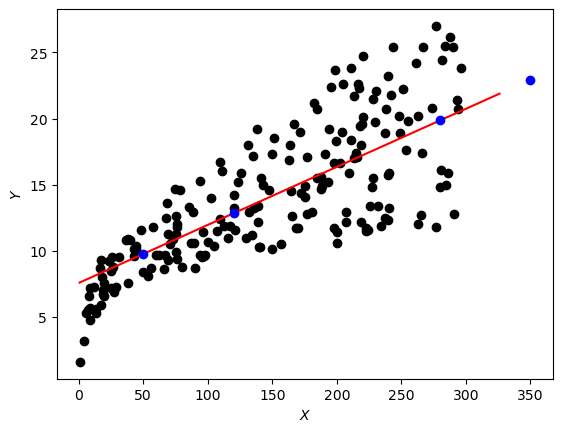

In [75]:
fig,ax = plt.subplots()
plt.scatter(df_o['TV'] , df_o['Sales'] , color = 'black');

plt.xlabel('$X$');
plt.ylabel('$Y$');

x_line = np.arange(np.min(df_o['TV']) , np.max(df_o['TV'])*1.1 , 0.1)
y_line = predict(df_o['TV'] , df_o['Sales'] , parameters , x_line)

ax.plot(x_line , y_line , 'r');
ax.plot(x_predict , y_predict , 'bo');
plt.plot();
plt.show();